<h1>Eksploracja Danych 2022 - Projekt</h1>

<h3>Autorzy: K. Jarek, P. Witek</h3>
<h3>Zbiór: "Concrete Data"</h3>
<p></p>
<a href="https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength">Link do zbioru danych</a>

<h3>Hipotezy:</h3>
<ol>
<li>Im wyższa wartość czynnika Cement i Superplasticizer oraz im więcej dni mineło od wylania betonu (im wyższa wartość Age) tym będzie miał wyższą wartość Concrete compressive strength (wytrzymałość na ściskanie).</li>
<li>Im wyższa wartość czynnika Fine Aggregate, Fly Ash i Blast Furnace Slag tym będzie miał wyższą wartość Concrete compressive strength.</li>
<li>Im mniejsza wartośc czynnika Water i Fine Aggregate oraz im więcej cementu (Cement) tym będzie miał wyższą wartość Concrete compressive strength.</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_excel ("Concrete_Data.xls")

In [4]:
df.head(20)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [5]:
df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
                   'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast Furnace Slag',
                   'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly Ash',
                   'Water  (component 4)(kg in a m^3 mixture)': 'Water',
                   'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
                   'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse Aggregate',
                   'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'Fine Aggregate', 
                   'Age (day)': 'Age',
                   'Concrete compressive strength(MPa, megapascals) ': 'Concrete compressive strength'},
                   inplace=True)
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [6]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [7]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [8]:
df.shape

(1030, 9)

In [9]:
df.drop_duplicates(inplace=True)
df.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [10]:
df.reset_index(inplace=True,drop=True)

In [11]:
print('Shape:', df.shape)
df.tail()

Shape: (1005, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1004,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [12]:
df.describe(include='all')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [13]:
df.median()

Cement                           265.000000
Blast Furnace Slag                20.000000
Fly Ash                            0.000000
Water                            185.700000
Superplasticizer                   6.100000
Coarse Aggregate                 968.000000
Fine Aggregate                   780.000000
Age                               28.000000
Concrete compressive strength     33.798114
dtype: float64

In [14]:
df.mode()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,251.37,0.0,0.0,192.0,0.0,932.0,594.0,28,31.350474


In [15]:
df.var()

Cement                           10887.879601
Blast Furnace Slag                7425.364576
Fly Ash                           4122.596436
Water                              455.427169
Superplasticizer                    35.041179
Coarse Aggregate                  6018.584052
Fine Aggregate                    6454.491667
Age                               4062.110923
Concrete compressive strength      265.194960
dtype: float64

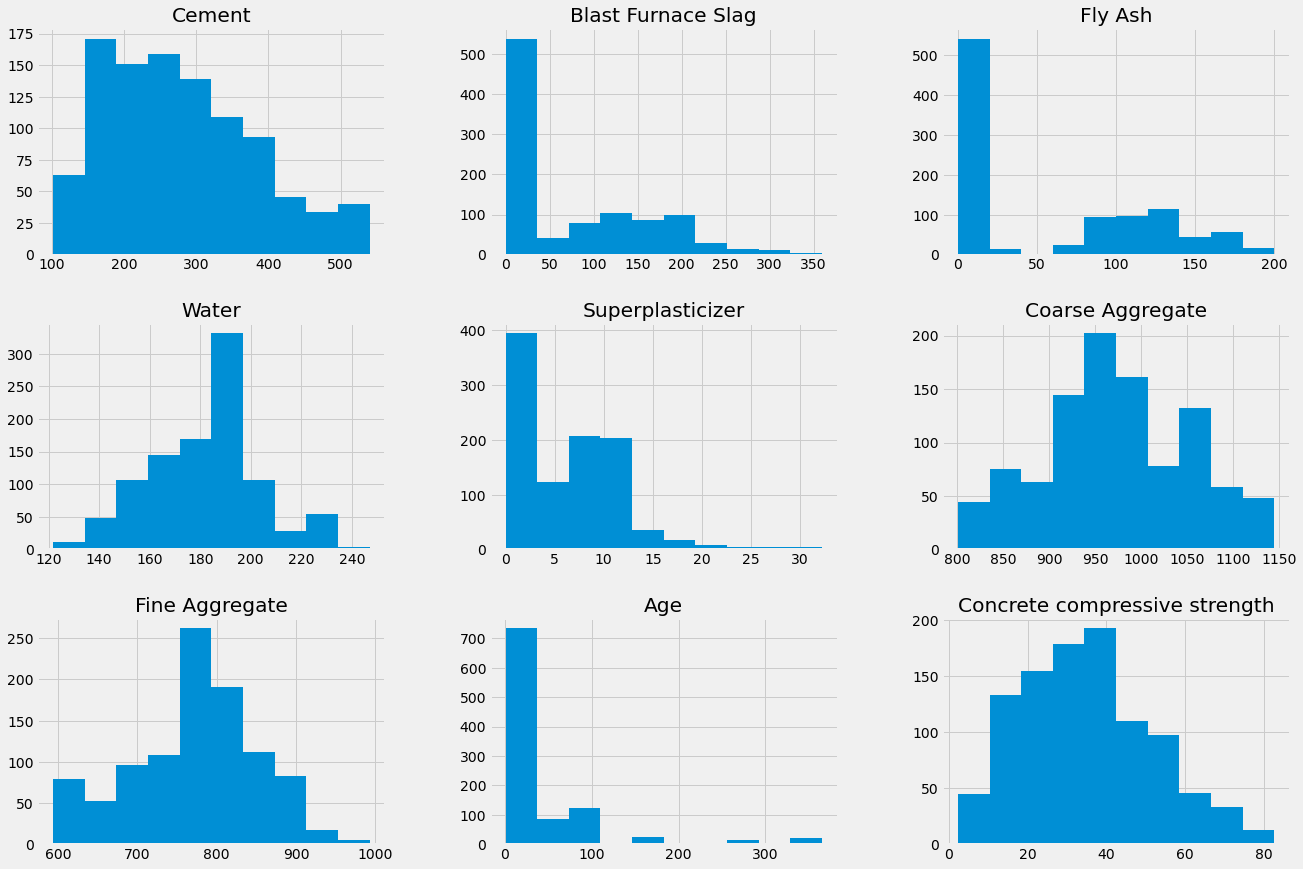

In [16]:
plt.rcParams['figure.figsize'] = [20, 14]
hist = df.hist()

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [18]:
formula  = "Q('Concrete compressive strength') ~ Cement + Q('Blast Furnace Slag') + Q('Fly Ash')"
formula += " + Water + Superplasticizer + Q('Coarse Aggregate') + Q('Fine Aggregate') + Age"

anova_model = smf.ols(formula=formula, data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Cement,20165.527069,1.0,190.406588,9.174293e-40
Q('Blast Furnace Slag'),10151.132415,1.0,95.848846,1.134475e-21
Q('Fly Ash'),4987.536535,1.0,47.093231,1.188107e-11
Water,1557.488546,1.0,14.706091,1.335323e-04
Superplasticizer,984.835166,1.0,9.298993,2.353398e-03
Q('Coarse Aggregate'),297.419127,1.0,2.808286,9.409240e-02
Q('Fine Aggregate'),310.936877,1.0,2.935923,8.694032e-02
Age,45821.207599,1.0,432.652208,4.373652e-80
Residual,105484.086039,996.0,NaN,NaN


In [19]:
anova_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Q('Concrete compressive strength')   R-squared:                       0.604
Model:                                            OLS   Adj. R-squared:                  0.601
Method:                                 Least Squares   F-statistic:                     189.8
Date:                                Sat, 28 May 2022   Prob (F-statistic):          2.58e-194
Time:                                        17:10:26   Log-Likelihood:                -3764.5
No. Observations:                                1005   AIC:                             7547.
Df Residuals:                                     996   BIC:                             7591.
Df Model:                                           8                                         
Covariance Type:                            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -17.7481     26.419     -0.672      0.502     -69.592      34.096
Cement                      0.1172      0.008     13.799      0.000       0.101       0.134
Q('Blast Furnace Slag')     0.0994      0.010      9.790      0.000       0.080       0.119
Q('Fly Ash')                0.0856      0.012      6.862      0.000       0.061       0.110
Water                      -0.1526      0.040     -3.835      0.000      -0.231      -0.075
Superplasticizer            0.2834      0.093      3.049      0.002       0.101       0.466
Q('Coarse Aggregate')       0.0156      0.009      1.676      0.094      -0.003       0.034
Q('Fine Aggregate')         0.0183      0.011      1.713      0.087      -0.003       0.039
Age                         0.1122      0.005     20.800      0.000       0.102       0.123
==============================================================================
Omnibus:                        4.034   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.923
Skew:                          -0.150   Prob(JB):                        0.141
Kurtosis:                       3.062   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18380\2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.00,-0.30,-0.39,-0.06,0.06,-0.09,-0.25,0.09,0.49
Blast Furnace Slag,-0.30,1.00,-0.31,0.13,0.02,-0.28,-0.29,-0.04,0.10
Fly Ash,-0.39,-0.31,1.00,-0.28,0.41,-0.03,0.09,-0.16,-0.08
Water,-0.06,0.13,-0.28,1.00,-0.65,-0.21,-0.44,0.28,-0.27
Superplasticizer,0.06,0.02,0.41,-0.65,1.00,-0.24,0.21,-0.19,0.34
Coarse Aggregate,-0.09,-0.28,-0.03,-0.21,-0.24,1.00,-0.16,-0.01,-0.14
Fine Aggregate,-0.25,-0.29,0.09,-0.44,0.21,-0.16,1.00,-0.16,-0.19
Age,0.09,-0.04,-0.16,0.28,-0.19,-0.01,-0.16,1.00,0.34
Concrete compressive strength,0.49,0.10,-0.08,-0.27,0.34,-0.14,-0.19,0.34,1.00


In [21]:
chisquare_stats = stats.chisquare(df, f_exp=None, ddof=0, axis=0)
print('Statistics:', chisquare_stats.statistic, '\np-value:', chisquare_stats.pvalue)

Statistics: [ 39232.91894428 103480.58984564  74531.03916632   2511.33016344
   5832.7924004    6201.56437323   8386.72430923  88937.01262856
   7553.29585965] 
p-value: [0.00000000e+000 0.00000000e+000 0.00000000e+000 4.38388802e-130
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000]


<AxesSubplot:>

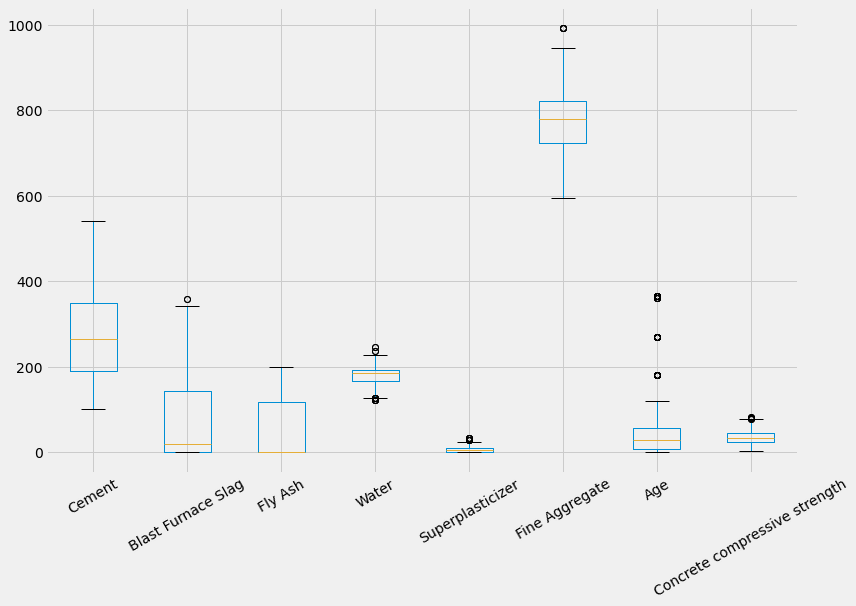

In [22]:
df.loc[:, df.columns != 'Coarse Aggregate'].boxplot(rot=30, figsize=(12, 8))

In [23]:
# normality test
shapiro_stat, shapiro_p = stats.shapiro(df[:-1])
print('Statistics: %f, p-value: %f' % (shapiro_stat, shapiro_p))

Statistics: 0.749661, p-value: 0.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


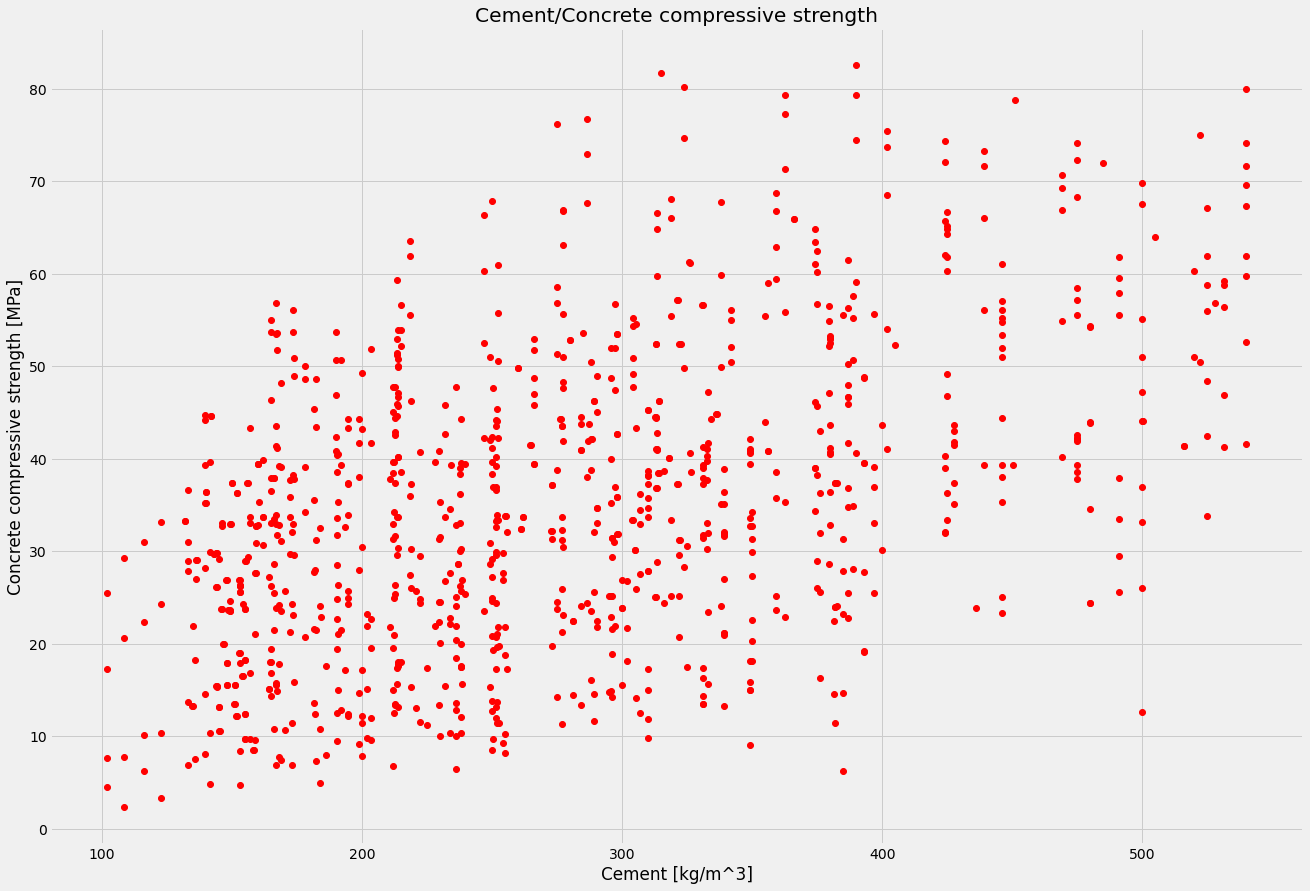

In [24]:
plt.plot(df['Cement'], df['Concrete compressive strength'], 'ro')
plt.xlabel('Cement [kg/m^3]')
plt.ylabel('Concrete compressive strength [MPa]')
plt.title('Cement/Concrete compressive strength')

plt.show()

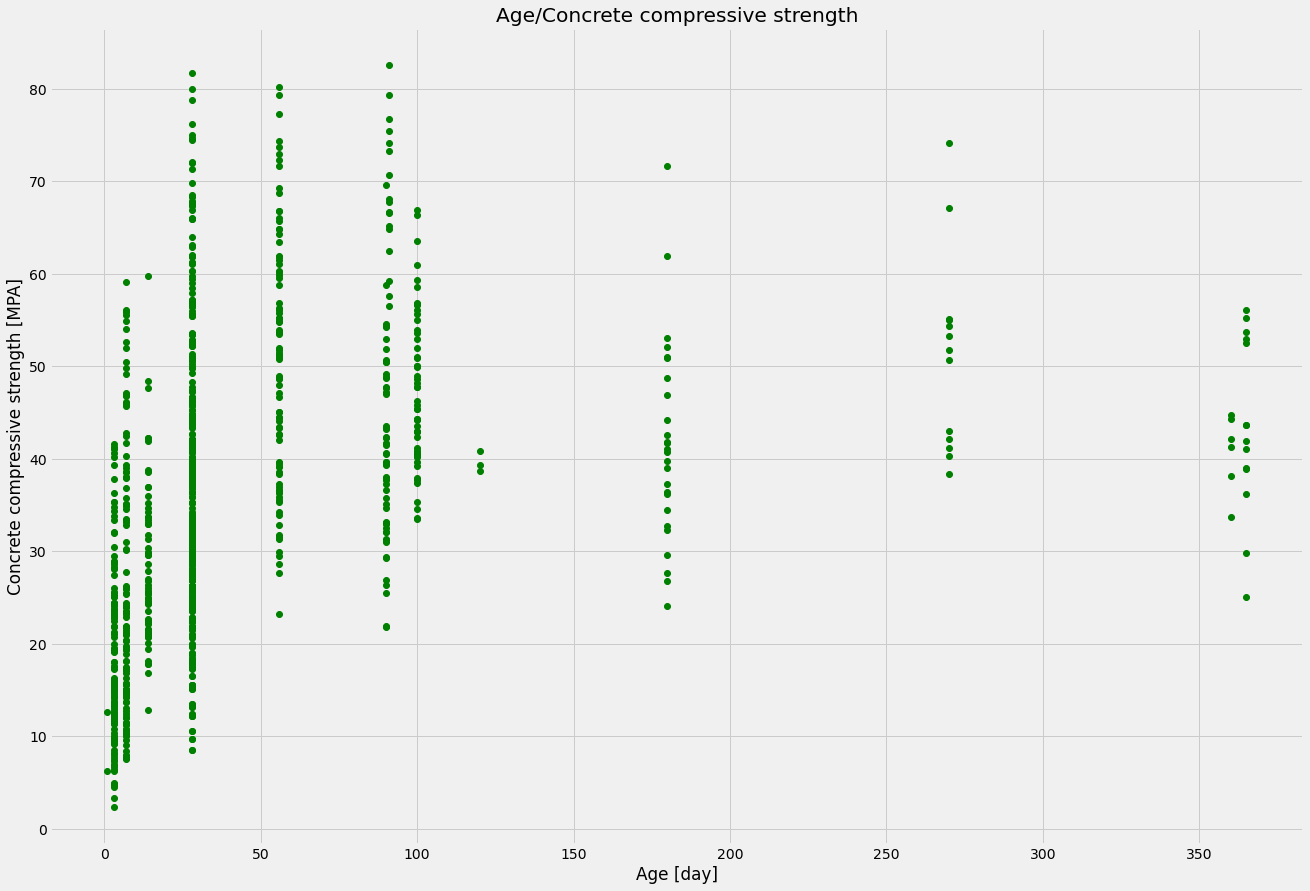

In [25]:
plt.plot(df['Age'], df['Concrete compressive strength'], 'go')
plt.xlabel('Age [day]')
plt.ylabel('Concrete compressive strength [MPA]')
plt.title('Age/Concrete compressive strength')

plt.show()

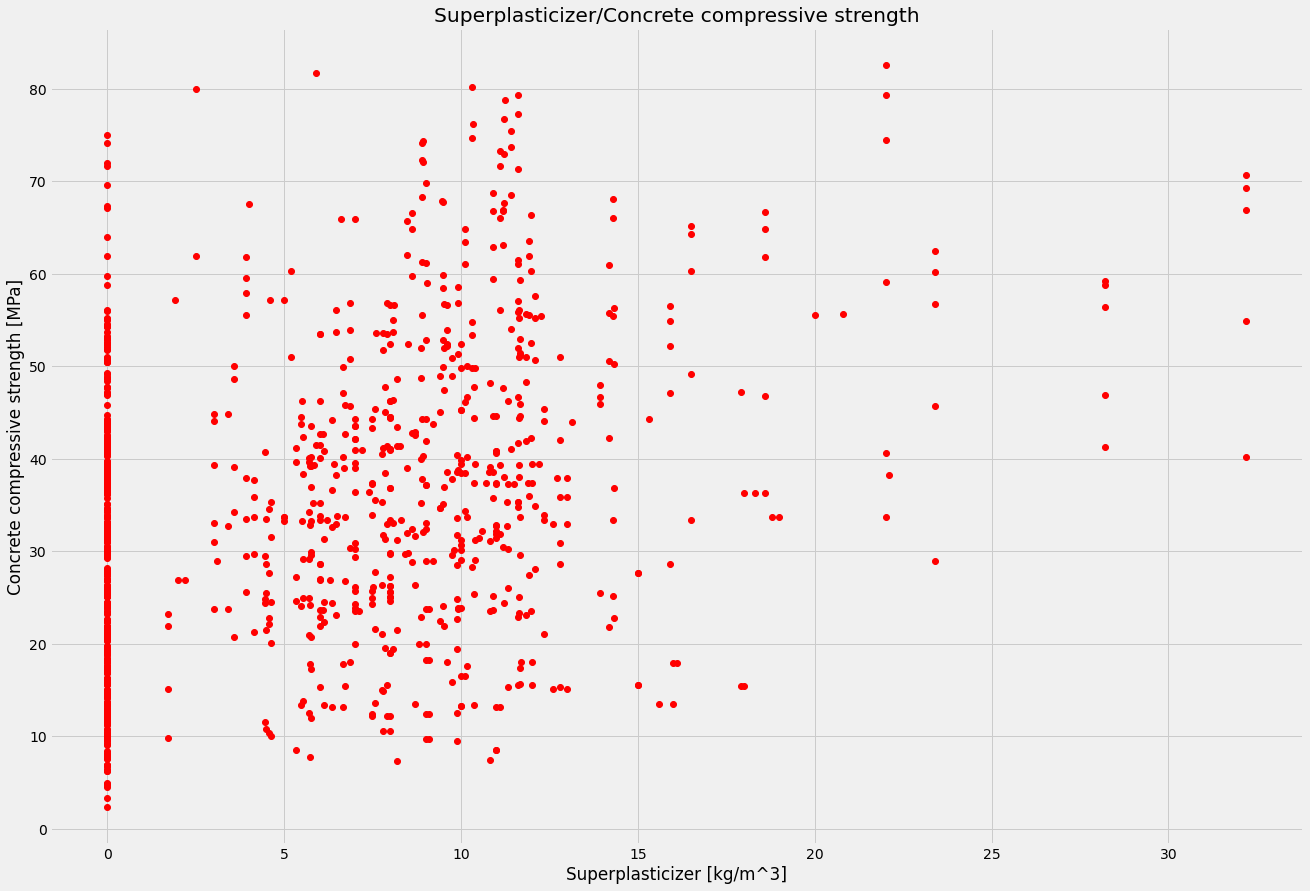

In [26]:
plt.plot(df['Superplasticizer'], df['Concrete compressive strength'], 'ro')
plt.xlabel('Superplasticizer [kg/m^3]')
plt.ylabel('Concrete compressive strength [MPa]')
plt.title('Superplasticizer/Concrete compressive strength')

plt.show()

<ul>
<li>Predyktory Cement i Superplasticizer są pozytywnie skorelowane z Concrete compressive strength.</li>
<li>Predyktory Water i Fine Aggregate są negatywnie skorelowane z Concrete compressive strength.</li>
<li>Predyktory Blast Furnace i Fly Ash nie wykazują korelacji z Concrete compressive strength.</li>
<li>Cement ma najsilniejszy wpływ na Concrete compressive strength.</li>
<li>Zmienne objaśniające są ze sobą słabo skorelowane.</li>
<li>Jednoznacznie trudna jest do określenia zależność danych występująca w ramach zbioru danych. Dla większości zmienych nie da się określeić jej jako liniowej, natomiast dla Cementu pojawia się lionowa rosnąca zależność.</li>
</ul>

<h2>Decision Tree Classifier</h2>

In [27]:
#Utworzenie zmiennych oraz wartości (train, test)
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Concrete compressive strength']
y = df['Concrete compressive strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [28]:
#Parametry drzewa regresyjnego
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_leaf=0.035, random_state=2)
dt = dt.fit(X_train, y_train)
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.035,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2,
 'splitter': 'best'}

In [29]:
#Wartości przewidywane dla zmiennych testowych
predictions = dt.predict(X_test)
print(predictions)

[46.22829641 46.22829641 20.38056582 37.07800831 12.03222193 31.73192632
 28.52733929 28.52733929 16.76407029 46.79597364 41.22049151 47.21396278
 28.52733929 56.69338546 28.52733929 34.67672007 28.52733929 47.21396278
 27.8835914  16.76407029 47.21396278 41.22049151 59.44124562 59.44124562
 20.38056582 46.22829641 41.22049151 56.69338546 28.52733929 34.67672007
 16.76407029 20.38056582 39.56084011 19.31197942 47.21396278 12.03222193
 46.22829641 19.31197942 46.22829641 28.52733929 31.73192632 36.02611955
 31.73192632 34.67672007 46.22829641 34.67672007 34.67672007 28.52733929
 46.79597364 31.73192632 47.21396278 36.02611955 59.44124562 12.03222193
 12.03222193 39.56084011 66.12437307 56.69338546 37.07800831 16.76407029
 31.73192632 56.69338546 46.22829641 47.21396278 41.22049151 20.38056582
 20.38056582 31.73192632 19.31197942 20.38056582 12.03222193 47.21396278
 41.22049151 28.52733929 46.22829641 31.73192632 46.22829641 56.69338546
 20.38056582 12.03222193 31.73192632 47.21396278 46

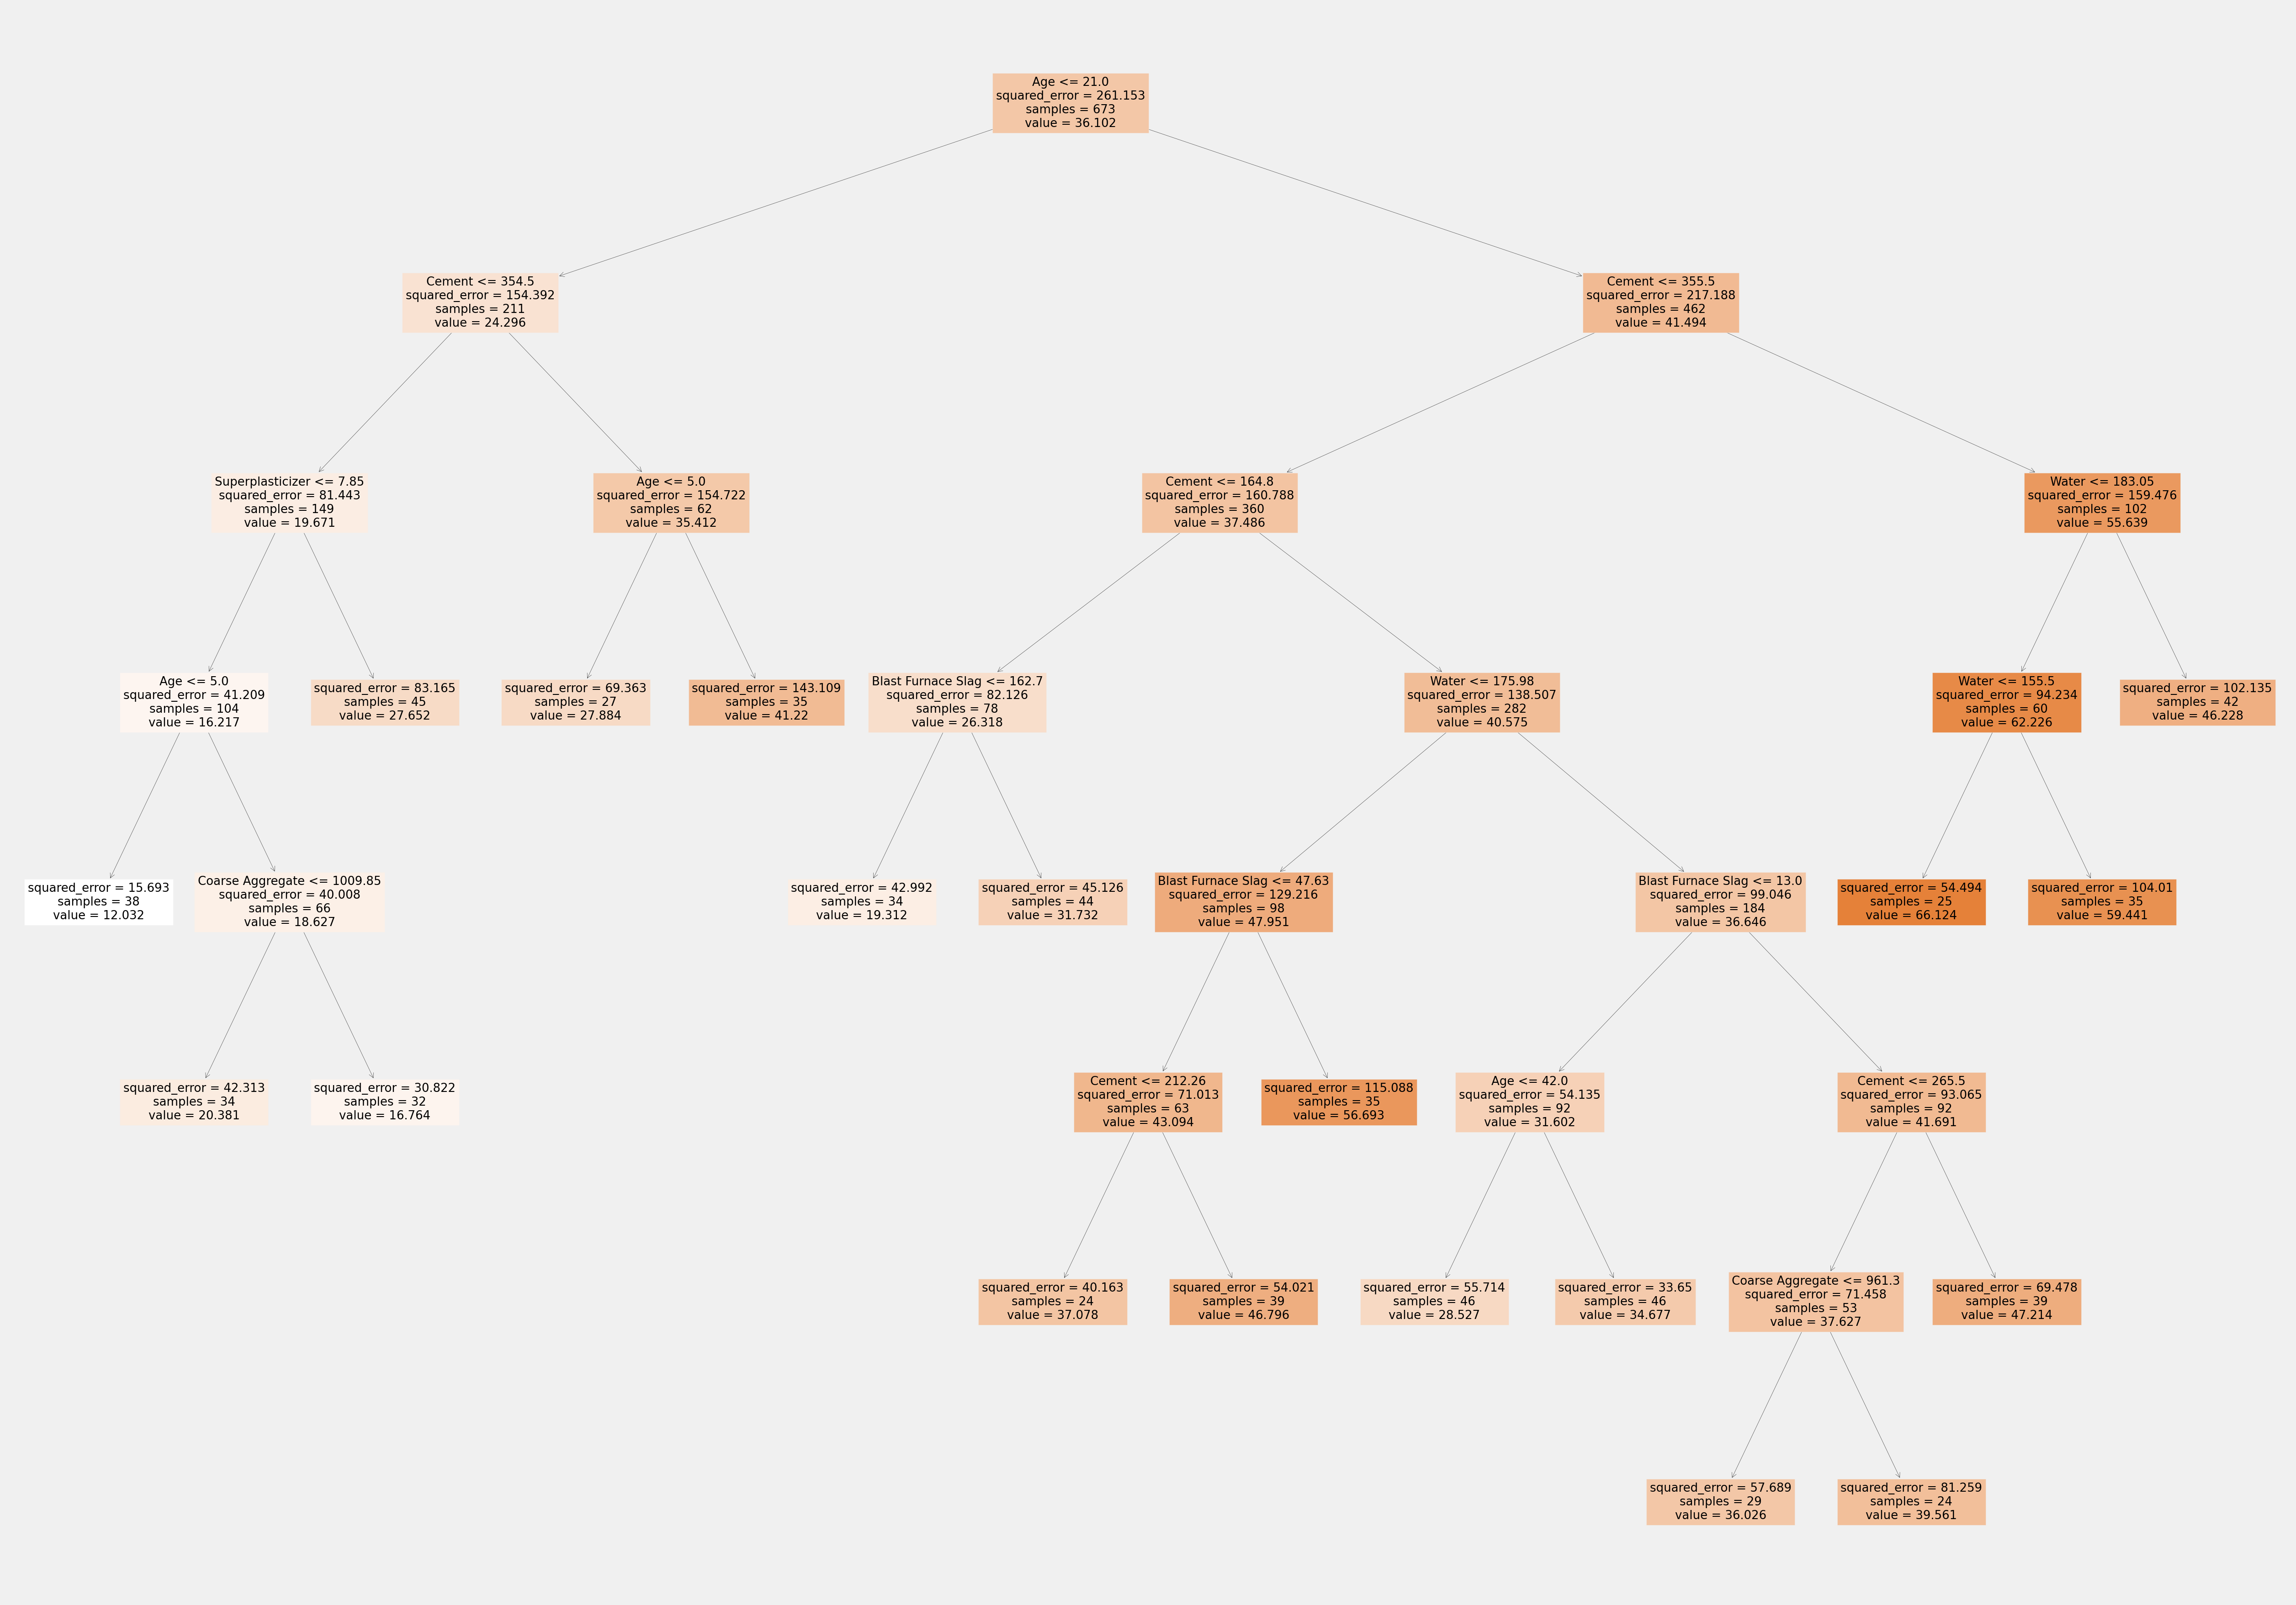

In [30]:
#Wykres drzewa regresyjnego
from sklearn.tree import plot_tree
plt.figure(figsize=(80,60))
plot_tree(dt,filled=True,feature_names=df.columns)
plt.show()

In [31]:
#Błąd R^2 Dla drzewa regresyjnego
from sklearn import metrics
r_square = metrics.r2_score(y_test, predictions)
print("R-Square Error associated with Decision Tree Regression is:", r_square)

R-Square Error associated with Decision Tree Regression is: 0.7142797380898367


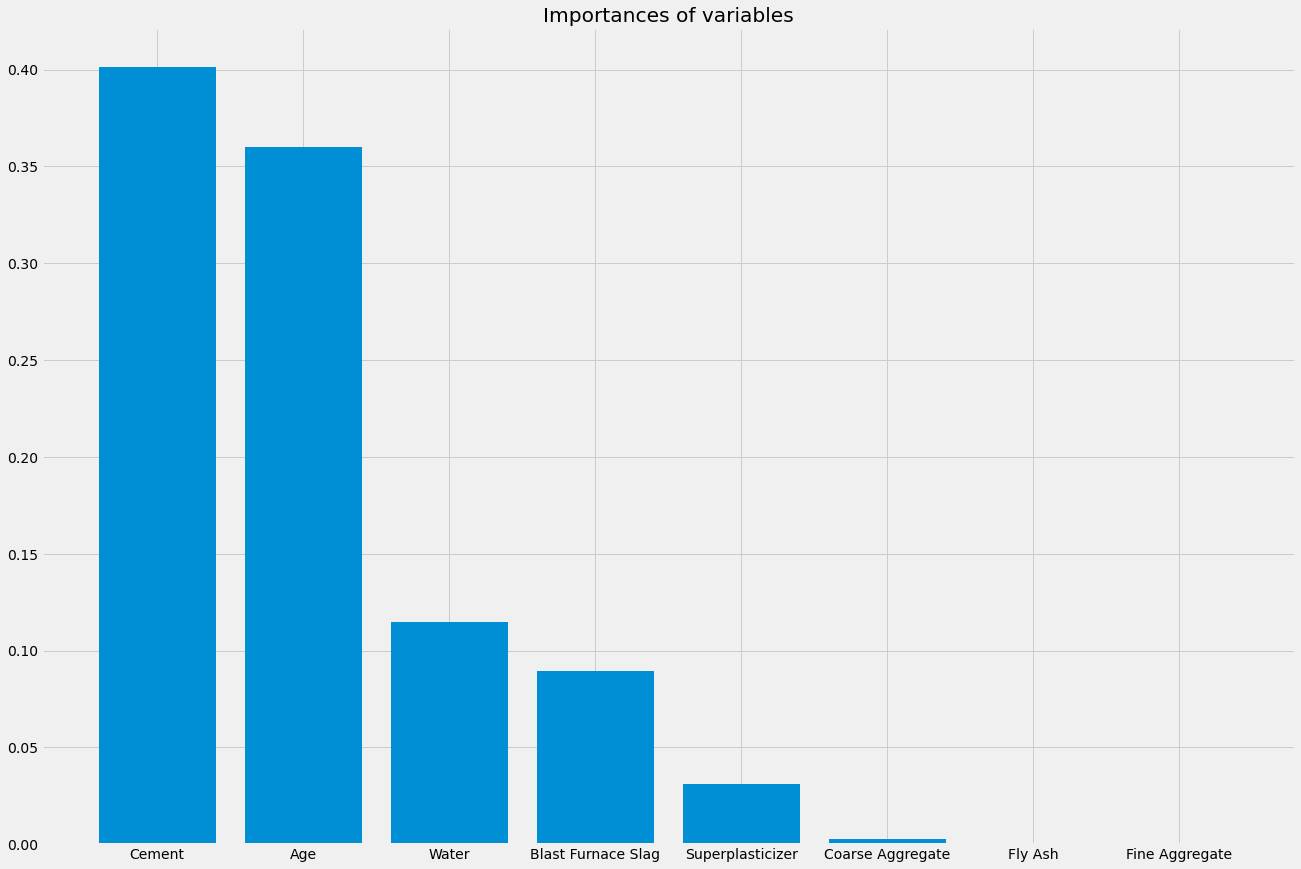

In [32]:
#Wykres ważności zmiennych
dt.feature_importances_
importances_df = pd.DataFrame({'Feature_names': X.columns, 'Importances': dt.feature_importances_}).sort_values(by='Importances',ascending=False)
plt.bar(importances_df['Feature_names'],importances_df['Importances'])
plt.title("Importances of variables")
plt.show()

<h3> Reguły oparte na drzewie klasyfikacynym dla najbardziej wyrazistych klas:</h3>
<ul>
<li>Cement mający powyżej 21 dni oraz zawierający powyżej 355.5 Concrete i zawierający wody w przedziale <155.5 ; 183> ma wysoką wytrzymałość na średnim poziome 66.124 MPa</li>
<li>Cement mający powyżej 21 dni oraz zawierający Concrete w przedziale <164.8; 355.5> oraz powyżej 162.7 Blast Furnance Slag ma wytrzymałość o średnim poziomie 19.312 MPa</li>
<li>Cement mający więcej niż 21 dni ale nie mniej niz 5 dni oraz zawierający mniej niż 354.5 Concrete i zawierający mniej niż 7.85 Superplasticizer  ma niską wytrzymałość na średnim poziome 12.032 MPa</li>

</ul>

<h1>#TODO</h1>
<b>koszt resubstytucji + ewentualna wariancja w liściach, obecnie jest policzony współczynnik determinacji dla każdego liścia (może wsytarczy w zamian za wariancje)
++ Na razie mamy hipotezy oparte tylko o jedną zmienną decyzyjną (Wytrzymałość na ściskanie). Jeśli prof. Regulski będzie chciał hipotezy oparte każda o inną zmienną decyzyjną, wtedy trzeba będzie wygenerować drzewo pod każdą hipotezę i do każdego drzewa wypisać reguły dla liści o najmniejszym współczynniku determinacji. </b>



<h2>Clustering</h2>

<h2>Artificial Neural Network</h2>

<h2>Random Forest</h2>